[1] "The customer ids are unique"
[1] "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"


Credit_History,Number_customers,Status_Checking_Acc,Total_customers
no credit,0.013,<$0,0.274
no credit at this bank,0.022,<$0,0.274
paid till now,0.160,<$0,0.274
delay in the past,0.012,<$0,0.274
critical,0.067,<$0,0.274
no credit,0.018,< $10000,0.269


[1] "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"
[1] "Customers with different checking accounts and their credit histories"


[1] "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"


[1] "Customers with maximum number of accounts have checking account balance: No checking account"

[1] "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"


[1] "Customers with minimum number of accounts have checking account balance: >=$10000"

[1] "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"


[1] "Customers with worst credit history have checking account balance: No checking account"

[1] "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"


[1] "Customers with best credit history have checking account balance: < $10000"

[1] "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"


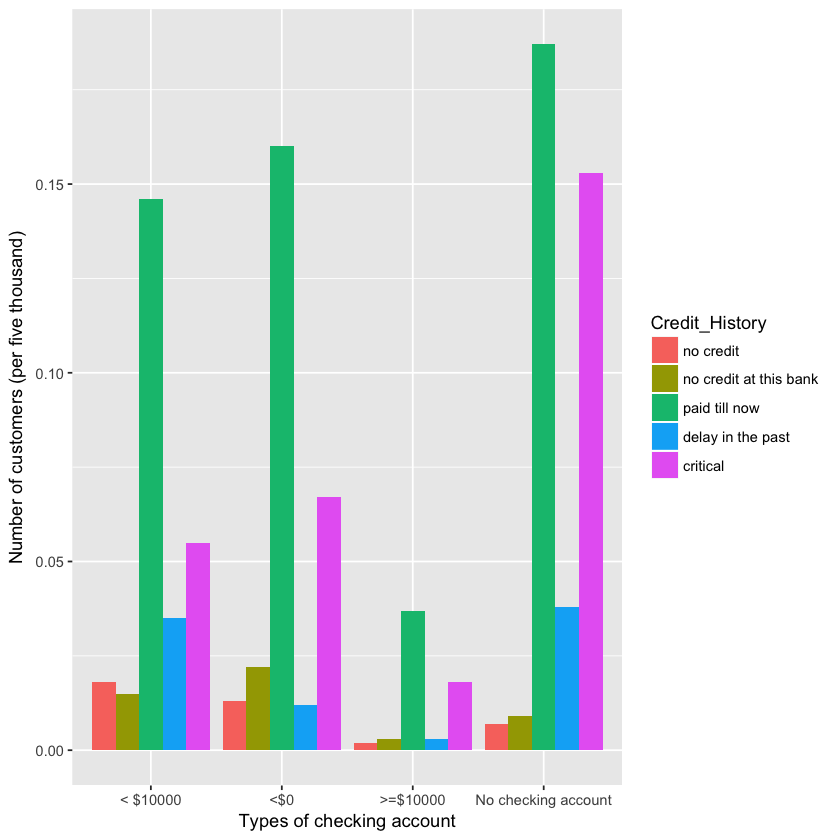

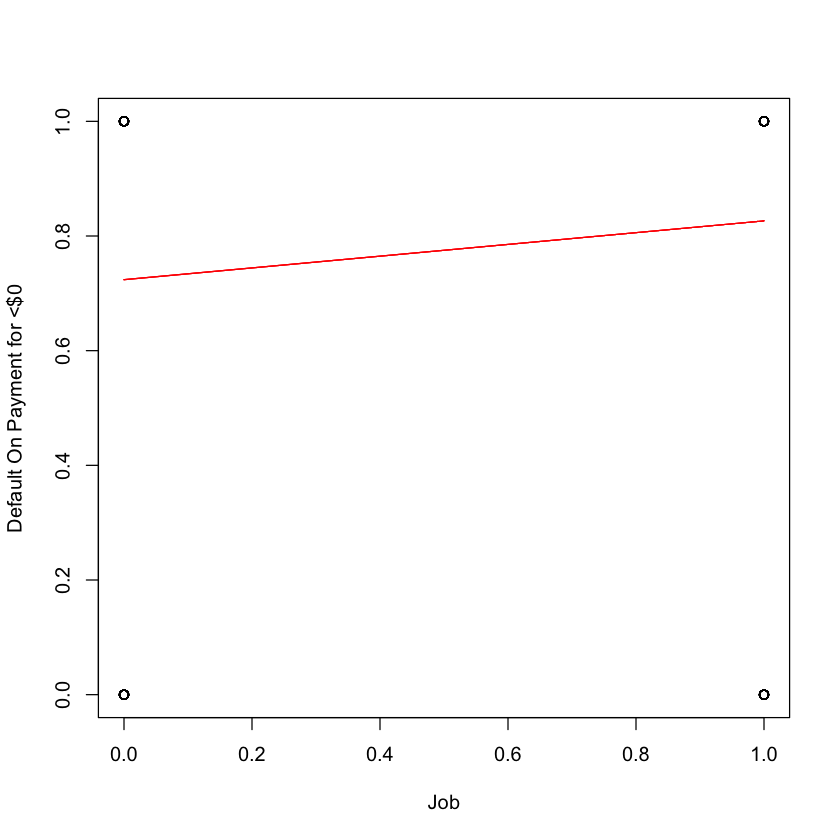

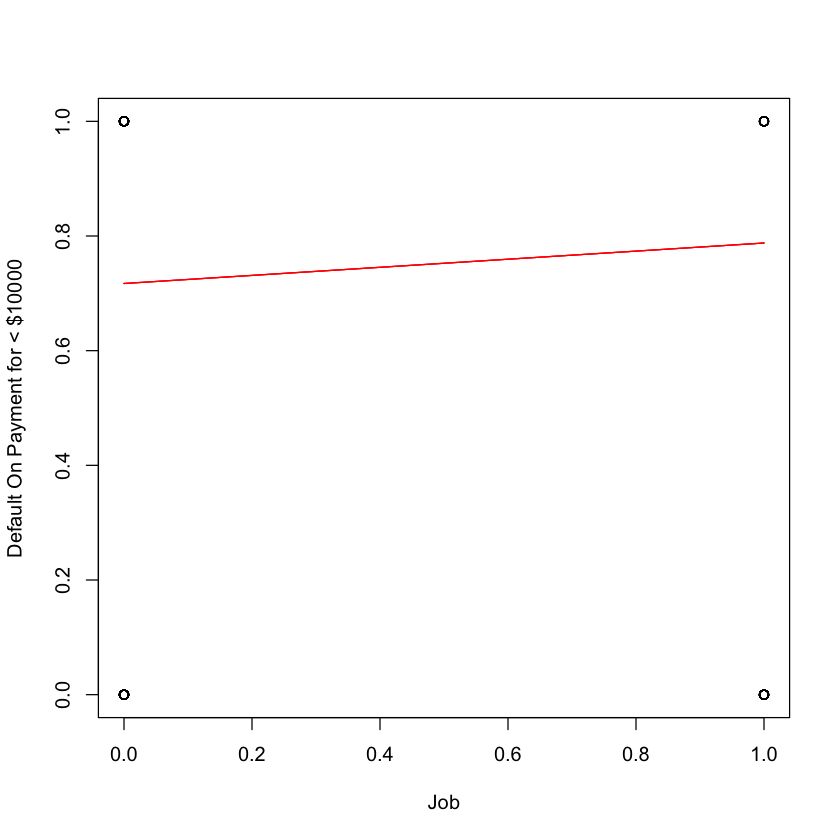

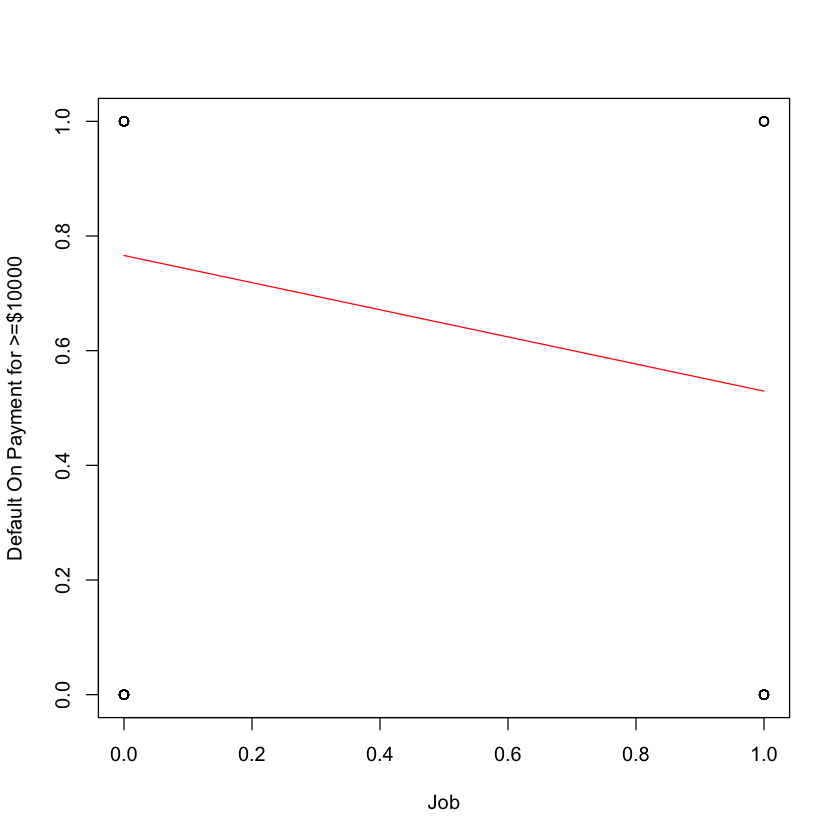

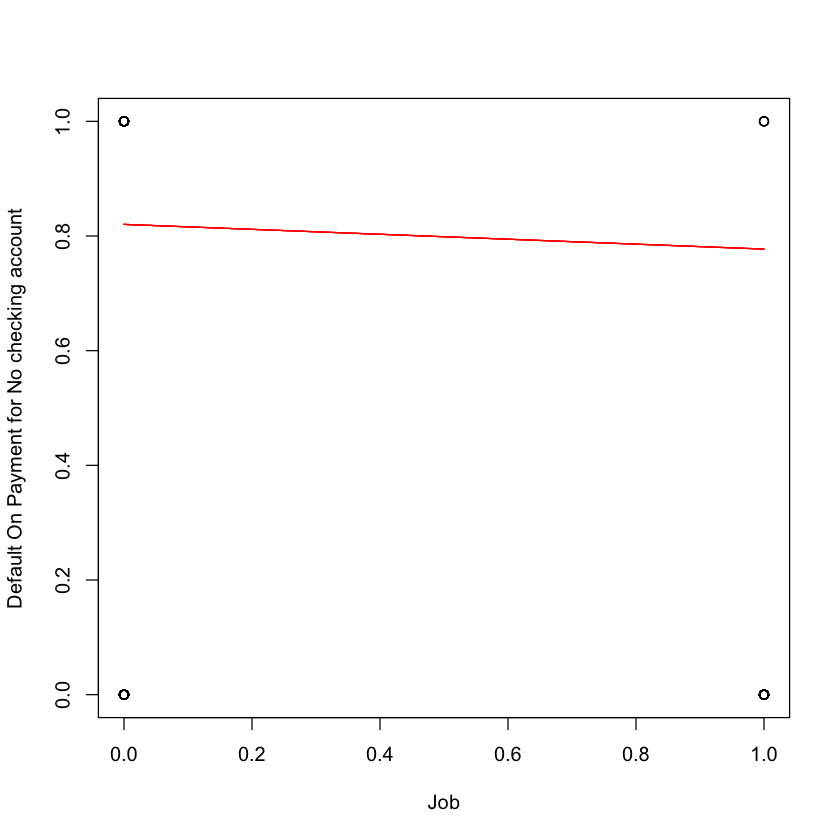

In [6]:
# Loading the required libraries
library(plyr)
library(dplyr)
library(ggplot2)
library(reshape2)

## Loading the file 
# Read CSV file into R
file <- 'Loan_Data.csv'
loan_file <- read.csv(file, header=TRUE, sep=",",skip=2)
#convert the file into a dataframe
loan_df <- data.frame(loan_file)


## A separator for separating the output
sep <- strrep('+',100)

# Removing empty columns and unnecessary column
loan_df <- Filter(function(x)!all(is.na(x)), loan_df)
    
# printing the first few rows of our datframe
#head(loan_df)

is.unq <- function(x) length(x)==length(unique(x))
# Check the Customer ids are unique 
if (is.unq(loan_df[['Customer_ID']])){
print ("The customer ids are unique")
}

loan_df$Credit_Amount <- scale(loan_df$Credit_Amount, center =
                               FALSE, scale =
                              max(loan_df$Credit_Amount,
                                  na.rm = TRUE)/100)
loan_df$Credit_Amount <- loan_df$Credit_Amount/100
# Extracting different kinds of checking accounts
checkng_accnts <- c('A11', 'A12', 'A13', 'A14')
# Associated 'actual'values
typ_accnt <- c('<$0','< $10000','>=$10000','No checking account')

# Creating a dictionary to make a mapping
loan_df[['Status_Checking_Acc']] <- mapvalues(loan_df[['Status_Checking_Acc']],
 from=checkng_accnts, to=typ_accnt)


# Extracting different kinds of credit histories
credt_hist <- c('A30', 'A31','A32', 'A33', 'A34')
# Associated 'actual'values
typ_credt <- c('no credit','no credit at this bank',
            'paid till now','delay in the past',
            'critical')

# Creating a dictionary to make a mapping

loan_df[['Credit_History']] <- mapvalues(loan_df[['Credit_History']],
                                         from=credt_hist, to=typ_credt)
#head(loan_df)

## Split the dataframe in groups of dataframes with 
## with similar checking accounts
df_ch_accnts <- split( loan_df , f = loan_df$Status_Checking_Acc)

# First we seek if there is a correlation
# between Checking account type and
# Credit history
# We construct a new datframe to visualise this

new_df = NULL
for (i in 1:length(checkng_accnts)){
temp_df <- df_ch_accnts[[typ_accnt[i]]][,c("Status_Checking_Acc",
                                           "Credit_History")]
temp_df <-  data.frame(temp_df%>%count(Credit_History))
colnames(temp_df) <- c('Credit_History','Number_customers')
temp_df$Status_Checking_Acc <- rep(typ_accnt[i],nrow(temp_df))
temp_df$Total_customers <- rep(sum(temp_df[['Number_customers']]),
                               nrow(temp_df))
new_df <- rbind(new_df,temp_df)
}
print (sep)
total_cust <- sum(new_df[['Number_customers']])
cols <- sapply(new_df, is.numeric)
new_df[, cols] <- new_df[, cols]/total_cust
head(new_df)
print (sep)
print ("Customers with different checking accounts and their credit histories")
ggplot(new_df, aes(x=Status_Checking_Acc, y=Number_customers,
                   fill=Credit_History)) + 
       geom_bar(stat='identity', position='dodge')+
labs(x="Types of checking account", 
y="Number of customers (per five thousand)")
print (sep)
paste("Customers with maximum number of accounts have checking account balance:",
new_df[which.max(new_df$Total_customers),]$Status_Checking_Acc,
      sep=" ")
print (sep)
paste("Customers with minimum number of accounts have checking account balance:",
new_df[which.min(new_df$Total_customers),]$Status_Checking_Acc,
      sep=" ")
print (sep)

crit_df <- new_df[new_df$Credit_History == 'critical',]
stats <- crit_df[which.max(crit_df$Number_customers),]$Status_Checking_Acc
paste("Customers with worst credit history have checking account balance:",
stats,sep=" ")
print (sep)
crit_df <- new_df[new_df$Credit_History == 'no credit',]
stats <- crit_df[which.max(crit_df$Number_customers),]$Status_Checking_Acc
paste("Customers with best credit history have checking account balance:",
stats,sep=" ")
print (sep)
    
# Constructing DataFrame with reduced features
reduced_featur_list <- c('Customer_ID','Status_Checking_Acc',
                         'Credit_History',
    'Credit_Amount','Job',
    'Default_On_Payment')
redcd_ft_df <- 0*(1:length(df_ch_accnts))

for (indx in 1:length(df_ch_accnts)){
df_ch_accnts[[typ_accnt[indx]]] <- df_ch_accnts[[typ_accnt[indx]]][,
                                                                   reduced_featur_list]}

#Lets partition the credity history into two blocks: 
#good (0 no default on loan payment) or bad (1 default on loan payment)!
credt_histry <- c('critical',
 'paid till now',
 'delay in the past',
 'no credit',
 'no credit at this bank')
bin_outcm <- c(1,0,1,0,0)
map_credt <- setNames(credt_histry, bin_outcm)


## Job mapping into two blocks again
## Employed or not employed
### 0 is employed, 1 is unemployed
job_histry <- c('A171', 'A172', 'A173', 'A174')
bin_job <- c(1,1,0,0)
map_job <- setNames(job_histry,bin_job)

for (indx in 1:length(df_ch_accnts)){
df_ch_accnts[[typ_accnt[indx]]][['Credit_History']] <- 
        mapvalues(df_ch_accnts[[typ_accnt[indx]]][['Credit_History']],
                            from=credt_histry, to=bin_outcm)}

for (indx in 1:length(df_ch_accnts)){
df_ch_accnts[[typ_accnt[indx]]][['Job']] <- 
                           mapvalues(df_ch_accnts[[typ_accnt[indx]]][['Job']],
                                         from=job_histry, to=bin_job)}
    
    
## Fitting a Binary Logistic Regression to the model
redcd_ft_lst <- c('Credit_History', 'Credit_Amount', 'Job',
                  'Default_On_Payment')

## Pick which feature
fet_index <- 3

# Loop over customers with different checking accounts
for (indx in 1:length(df_ch_accnts)){
data <- df_ch_accnts[[typ_accnt[indx]]][,redcd_ft_lst]
n <- nrow(data)
shuffled_df <- data[sample(n), ]
train_indices <- 1:round(0.8 * n)
train <- shuffled_df[train_indices, ]
test_indices <- (round(0.8 * n) + 1):n
test <- shuffled_df[test_indices, ]
ftr <- train[[redcd_ft_lst[fet_index]]]
tgt <- train[['Default_On_Payment']]

ftr_tst <- test[[redcd_ft_lst[fet_index]]]
tgt_tst <- test[['Default_On_Payment']]

# Fitting a binary logistic regression
model <- glm(ftr~tgt,binomial)

#summary(model)

xv <- as.numeric(as.character(ftr_tst), na.rm=TRUE)

yv <- predict(model,list(tgt=xv),type='response')

plot(xv,tgt_tst,xlab=redcd_ft_lst[fet_index],
  	ylab=paste("Default On Payment for ",typ_accnt[indx],sep=""),
     xlim=c(0,1),ylim=c(0,1))
lines(xv,yv,col='red',xlim=c(0,1),ylim=c(0,1))}


